In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [68]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [69]:
train_data_id=train_data['Id']
test_data_id=test_data['Id']
train_data.drop("Id",axis=1,inplace=True)
test_data.drop("Id",axis=1,inplace=True)

In [70]:
train_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

C:\Users\Sinan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


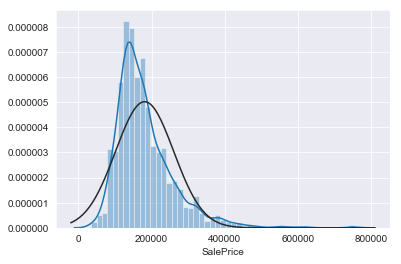

In [71]:
sns.distplot((train_data['SalePrice']),fit=norm)

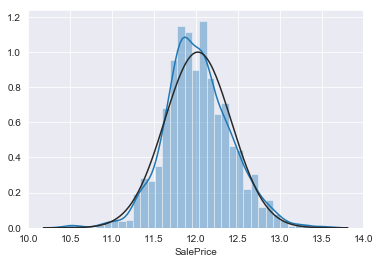

In [72]:
sns.distplot(np.log1p(train_data['SalePrice']),fit=norm)

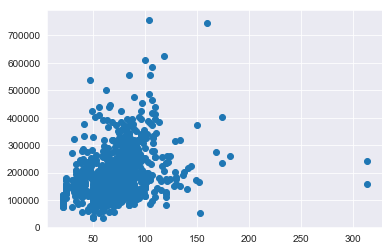

In [73]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['LotFrontage'], y = train_data['SalePrice'])
plt.show()

In [74]:
train_data=train_data.drop(train_data[(train_data['LotFrontage']>300)].index)
train_data=train_data.drop(train_data[(train_data['LotArea']>100000)].index)
train_data=train_data.drop(train_data[(train_data['TotalBsmtSF']>6000)].index)
train_data=train_data.drop(train_data[(train_data['GrLivArea']>4600)].index)

In [75]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

In [76]:
y_train=train_data.SalePrice.values

In [77]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
all_data = pd.concat((train_data, test_data))

In [78]:
#train_data['SalePrice'].corr(train_data['LotArea'])

In [79]:
all_data.drop("SalePrice",axis=1,inplace=True)

In [80]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.690934
MiscFeature,96.462912
Alley,93.200549
Fence,80.391484
FireplaceQu,48.763736
LotFrontage,16.586538
GarageQual,5.460165
GarageCond,5.460165
GarageFinish,5.460165
GarageYrBlt,5.460165


In [81]:
column_names_None=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageType","GarageFinish",
             "GarageQual","GarageCond","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2","MasVnrType"
             ,"MSSubClass"]
for i in column_names_None:
    all_data[column_names_None] = all_data[column_names_None].fillna("None")

In [82]:
column_names_zero=["GarageYrBlt", "GarageArea", "GarageCars","BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
                   "TotalBsmtSF","BsmtFullBath", "BsmtHalfBath","MasVnrArea"]
for i in column_names_zero:
    all_data[column_names_zero]=all_data[column_names_zero].fillna(0)

In [83]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
LotFrontage,483
MSZoning,4
Utilities,2
Functional,2
SaleType,1
KitchenQual,1
Exterior2nd,1
Exterior1st,1
Electrical,1


The most important one is the LotFrontage varible we can fill the other variables with mode values.

In [84]:
 all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [85]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data.drop("Utilities",axis=1,inplace=True)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [86]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


In [87]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,Normal,WD,0,Pave,5,796.0,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,Normal,WD,0,Pave,7,1686.0,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,Normal,WD,0,Pave,7,1107.0,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,Abnorml,WD,0,Pave,8,952.0,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,Normal,WD,0,Pave,5,991.0,0,1939,1950,2008


#### The variables like class  
1.MSSubClass  
2.OverallQual  
3.OverallCond  



In [88]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['MoSold'] = all_data['MoSold'].astype(str)

In [89]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [90]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [91]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [92]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.944005
PoolArea,17.673354
LowQualFinSF,12.073977
3SsnPorch,11.362112
LandSlope,4.976698
KitchenAbvGr,4.296287
BsmtFinSF2,4.158442
EnclosedPorch,3.998474
ScreenPorch,3.941117
BsmtHalfBath,3.940486


In [93]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [94]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2912, 220)


In [95]:
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]

In [96]:
train_data['OverallCond'].describe()

count    1453.000000
mean        1.938193
std         0.259170
min         0.000000
25%         1.820334
50%         1.820334
75%         2.055642
max         2.602594
Name: OverallCond, dtype: float64

In [97]:
len(train_data)==len(y_train)

True

In [98]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [99]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmse= np.sqrt(-cross_val_score(model, train_data.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [100]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [56]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1183 (0.0102)



In [122]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1155 (0.0072)



In [120]:
from sklearn.model_selection import train_test_split

X=train_data
y=y_train

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [130]:
model_lgb.fit(train_data,y_train)
prediction_lgb=model_lgb.predict(train_data)
print(np.sqrt(mean_squared_error(y_train, prediction_lgb)))

0.07265673544843121


In [131]:
model_xgb.fit(train_data, y_train)
prediction_xgb = model_xgb.predict(train_data)
print(np.sqrt(mean_squared_error(y_train, prediction_xgb)))

0.07904195524095048


In [132]:
prediction_last=model_lgb.predict(test_data)

In [134]:
prediction_last=np.expm1(prediction_last)

In [138]:
sub=pd.DataFrame()
sub['Id']=test_data_id
sub['SalePrice']=prediction_last

In [139]:
sub.to_csv('submission.csv',index=False)